# CIFAR-10 Image Classification with Transfer Learning


# Project Description
This project focuses on image classification using the **CIFAR-10** database. The goal is to develop two deep learning models (MLP and CNN) to predict images classes in the database. In addition, we'll apply the Transfer Learning technique with the **VGG16** model which is pre-traind computer vision model on ImageNet dataset to improve model performance.

# Dataset description
The CIFAR-10 database contains 60000 color images (32x32 pixels) divided into 10 classes, with 6,000 images per class. Classes include common objects such as airplanes, cars, birds, cats, deer, dogs, frogs, horses, boats and trucks.

# Importing libraries

In [24]:
# Importing important libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16

# Data Exploration

In [2]:
# CIFAR-10 ndataset loading
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# CIFAR-10 classes
cifar10_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Display the shape of training and test sets
print("Shape of training set (images):", x_train.shape)
print("Shape of training set (labels):", y_train.shape)
print("Shape of test set (images):", x_test.shape)
print("Shape of test set (labels):", y_test.shape)


Shape of training set (images): (50000, 32, 32, 3)
Shape of training set (labels): (50000, 1)
Shape of test set (images): (10000, 32, 32, 3)
Shape of test set (labels): (10000, 1)


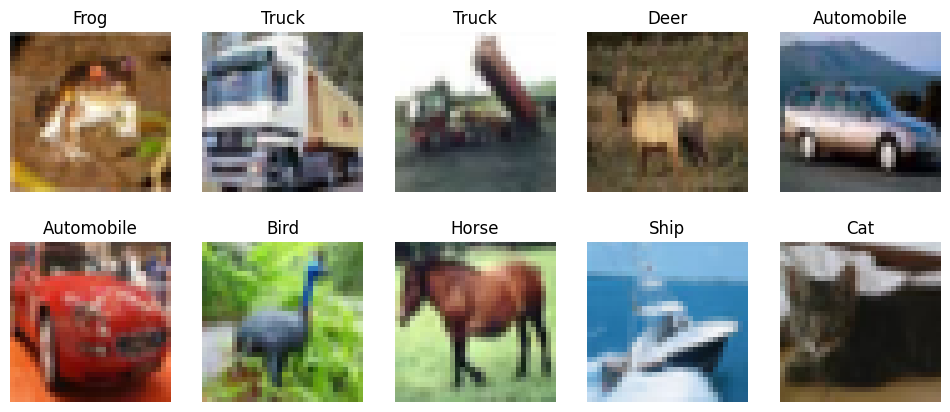

In [4]:
# Showing some sample images and their labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()

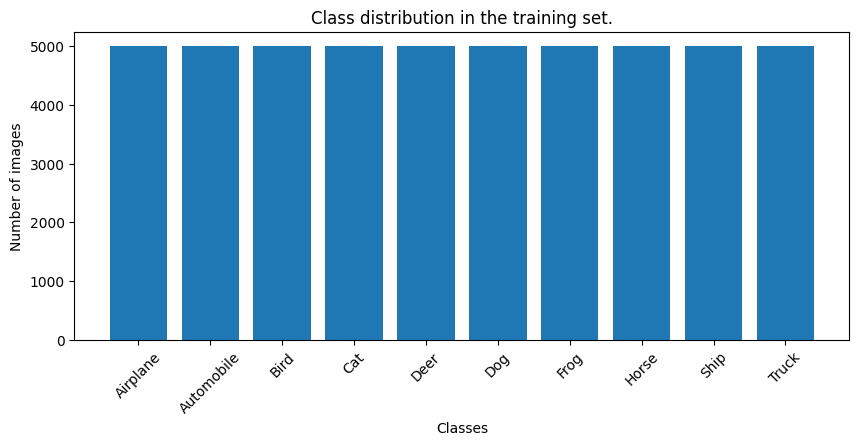

In [5]:
# Showing class distribution in training set
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1

plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Class distribution in the training set.")
plt.xlabel("Classes")
plt.ylabel("Number of images")
plt.xticks(rotation=45)
plt.show()

The histogram shows that we have a balanced data set.

# Data Pre-processing

In [6]:
# Normalization of image pixels by scaling between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
# Categorical encoding: transform labels into one-hot vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [8]:
# Showing shapes after preprocessing
print("Shape of training set (images):", x_train.shape)
print("Shape of training set (labels):", y_train.shape)
print("Shape of test set (images):", x_test.shape)
print("Shape of test set (labels):", y_test.shape)

Shape of training set (images): (50000, 32, 32, 3)
Shape of training set (labels): (50000, 10)
Shape of test set (images): (10000, 32, 32, 3)
Shape of test set (labels): (10000, 10)


# Multilayer Perceptron (MLP) model

In [26]:
# Define the MLP model for images classification
model_mlp = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile model with loss function, optimizer and metrics
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Showing the model summary for information on layers and parameters
model_mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Training the model on the raining set
epochs = 100
batch_size = 32
historique = model_mlp.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.2495 - loss: 2.1166 - val_accuracy: 0.3163 - val_loss: 1.8777
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3571 - loss: 1.8200 - val_accuracy: 0.3792 - val_loss: 1.7721
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3766 - loss: 1.7575 - val_accuracy: 0.3720 - val_loss: 1.7557
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3906 - loss: 1.7156 - val_accuracy: 0.3883 - val_loss: 1.7412
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4046 - loss: 1.6782 - val_accuracy: 0.3995 - val_loss: 1.6827
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4119 - loss: 1.6568 - val_accuracy: 0.3957 - val_loss: 1.6907
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4201 - loss: 1.6334 - val_accuracy: 0.3979 - val_loss: 1.6816
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4193 - loss: 1.6255 - val_accuracy: 0

In [30]:
# Model evaluation on the test set
test_loss, test_accuracy = model_mlp.evaluate(x_test, y_test, verbose=2)
print('The MLP model accuracy on test set is:{}%'.format(test_accuracy*100)) #40.87%

313/313 - 1s - 2ms/step - accuracy: 0.4087 - loss: 1.6352
The model accuracy on test set is:40.869998931884766%


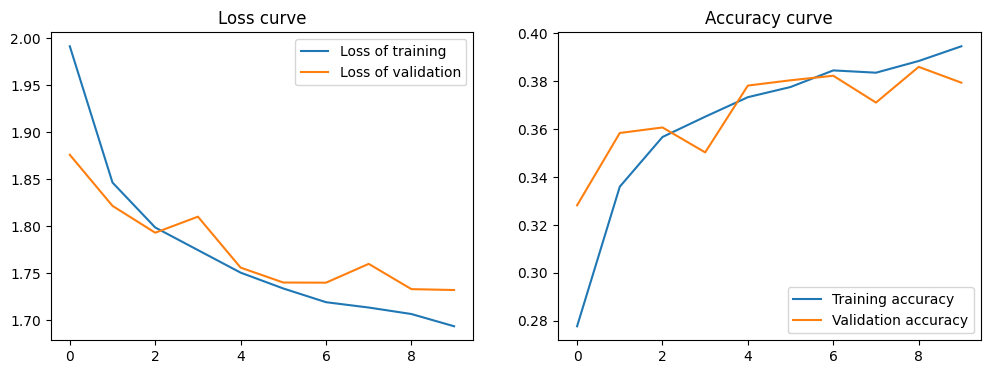

In [14]:
# Showing learning curves (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label="Loss of training")
plt.plot(historique.history['val_loss'], label="Loss of validation")
plt.legend()
plt.title("Loss curve")

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label="Training accuracy")
plt.plot(historique.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Accuracy curve")

plt.show()

In [15]:
# Defining classes
CLASSES = np.array(["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"])
# Predict classes for test data
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


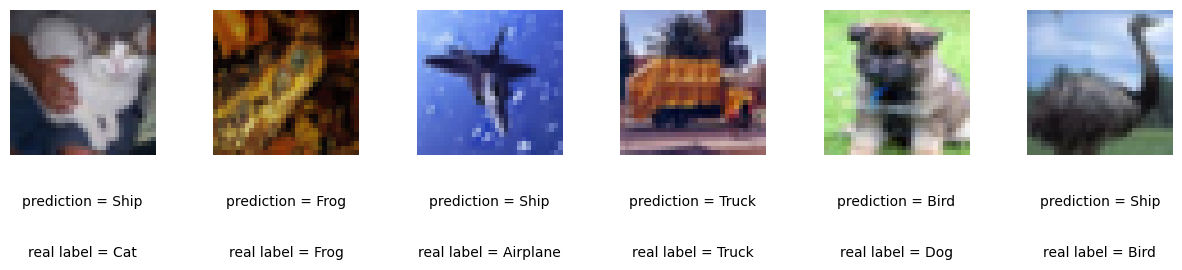

In [16]:
# Number of imags to show
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Create a figure to show the images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Showing real images with their predictions
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prediction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "real label = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
plt.show()

# Convolutional Neural Network (CNN)model

In [17]:
# Model building
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile model with loss function, optimizer and metrics
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Training the CNN model on the training set
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Model evaluation on the test set
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 79ms/step - accuracy: 0.2781 - loss: 1.9324 - val_accuracy: 0.5079 - val_loss: 1.4073
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.4771 - loss: 1.4523 - val_accuracy: 0.5733 - val_loss: 1.2404
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.5163 - loss: 1.3451 - val_accuracy: 0.5943 - val_loss: 1.1389
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5647 - loss: 1.2257 - val_accuracy: 0.6014 - val_loss: 1.1390
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.5908 - loss: 1.1541 - val_accuracy: 0.6447 - val_loss: 1.0346
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.6101 - loss: 1.1081 - val_accuracy: 0.6534 - val_loss: 0.9901
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 78ms/step - accuracy: 0.6349 - loss: 1.0447 - val_accuracy: 0.6595 - val_loss: 0.9787
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6487 - loss: 0.9980 - 

In [20]:
# Model accuracy on the test set
print('The CNN model accuracy on test set is: {}%'.format(test_accuracy*100)) #68.13%

Précision sur les données de test : 68.12999844551086%


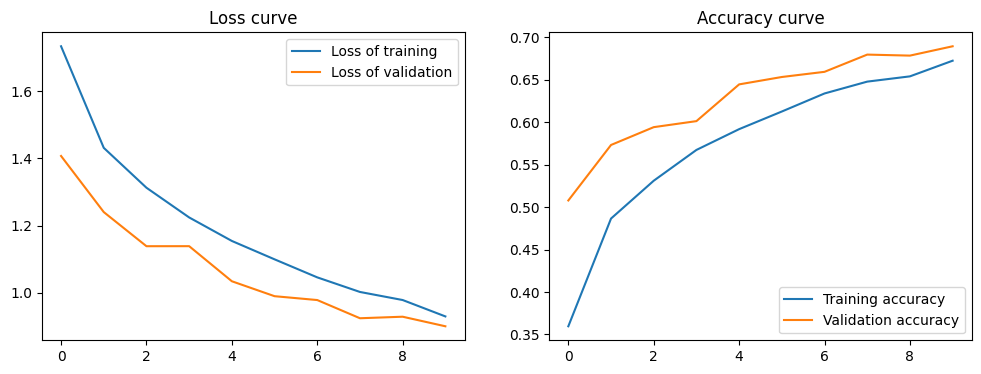

In [21]:
# Showing learning curves (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label = "Loss of training")
plt.plot(history_cnn.history['val_loss'], label="Loss of validation")
plt.legend()
plt.title('Loss curve')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label="Training accuracy")
plt.plot(history_cnn.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title('Accuracy curve')

plt.show()

In [18]:
# Defining classes
CLASSES = np.array(["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"])
# Predict classes for test data
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]

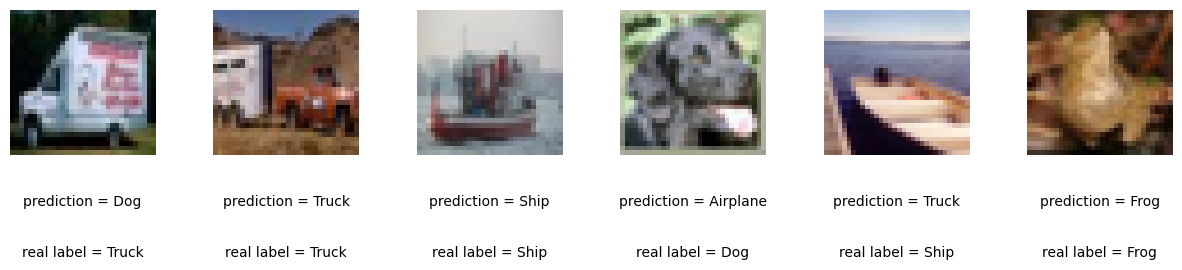

In [23]:
# Number of imags to show
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Create a figure to show the images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Showing real images with their predictions
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prediction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "real label = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
plt.show()

# Transfer learning model with VGG16

In [31]:
# Loading the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
# Adding the classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [34]:
# Create the complete model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model to prevent their training
for layer in base_model.layers:
    layer.trainable = False

# Compile model with loss function, optimizer and metrics
model_transfer.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Training the transfer learning model on the training set
epochs = 10
batch_size = 64

history_transfer = model_transfer.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
test_loss, test_accuracy = model_transfer.evaluate(x_test, y_test, verbose=2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 556s 885ms/step - accuracy: 0.4102 - loss: 1.6701 - val_accuracy: 0.5557 - val_loss: 1.2689
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 553s 872ms/step - accuracy: 0.5493 - loss: 1.2919 - val_accuracy: 0.5683 - val_loss: 1.2129
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 548s 850ms/step - accuracy: 0.5743 - loss: 1.2252 - val_accuracy: 0.5835 - val_loss: 1.1818
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 851ms/step - accuracy: 0.5871 - loss: 1.1757 - val_accuracy: 0.5949 - val_loss: 1.1651
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 561s 850ms/step - accuracy: 0.5968 - loss: 1.1562 - val_accuracy: 0.6035 - val_loss: 1.1319
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 560s 848ms/step - accuracy: 0.6047 - loss: 1.1241 - val_accuracy: 0.6050 - val_loss: 1.1330
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 562s 847ms/step - accuracy: 0.6151 - loss: 1.0926 - val_accuracy: 0.6099 - val_loss: 1.1257
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 849ms/step - accuracy: 0.6248 -

In [36]:
# Showing the transfer learning model accuracy
print('The VGG16 transfer learning model accuracy on test set is: {}%.'.format(test_accuracy*100))

The VGG16 transfer learning model accuracy on test set is: 61.40999794006348%.


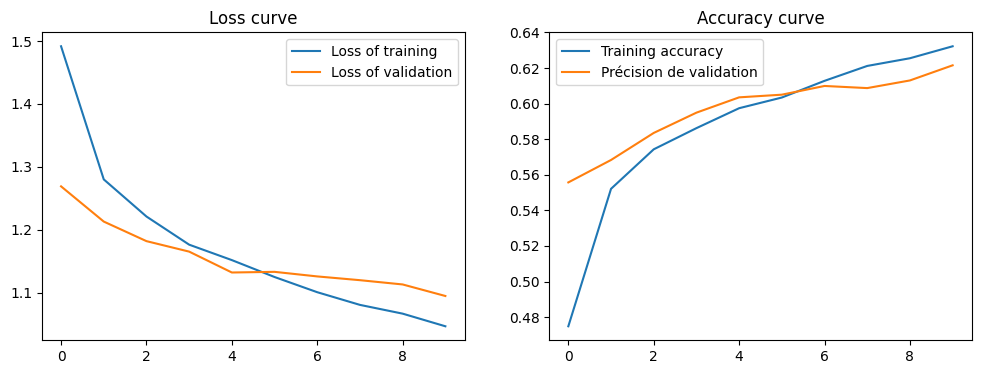

In [37]:
# Showing learning curves (loss and accuracy)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['loss'], label="Loss of training")
plt.plot(history_transfer.history['val_loss'], label="Loss of validation")
plt.legend()
plt.title('Loss curve')

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['accuracy'], label="Training accuracy")
plt.plot(history_transfer.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Accuracy curve')

plt.show()

# Conclusion

This project explored image classification on the CIFAR-10 dataset using multiple deep learning approaches: an MLP model, a CNN model, and Transfer Learning with the VGG16 model. The performances of the models were evaluated based on their accuracy on the test set. Here are the key findings:

- **MLP Model Performance**:  an accuracy of **40.86%** on the test set. This relatively low accuracy highlights the limitations of using a fully connected architecture for image data, as MLPs are not designed to effectively capture spatial relationships in images.

- **CNN Model Performance**:  a significantly higher accuracy of **68.13%** on the test set. This improvement demonstrates the effectiveness of convolutional layers in extracting spatial and hierarchical features from image data, making CNNs a more suitable choice for image classification tasks.

- **Transfer Learning with VGG16**: the transfer learning approach achieved an accuracy of **61.30%** on the test set. While this accuracy is lower than the CNN model's performance, transfer learning still showed promise in leveraging pre-trained knowledge to classify CIFAR-10 images, despite the domain gap between ImageNet and CIFAR-10.


### **Future Improvements**
- Further tuning the CNN architecture like adding more layers, data augmentation, or regularization could potentially yield even better accuracy.  
- Fine-tuning the VGG16 model on the CIFAR-10 dataset instead of using it as a fixed feature extractor might improve the transfer learning results.  
- Experimenting with more advanced architectures like ResNet or EfficientNet could lead to higher accuracy, as these models are designed to handle both simple and complex datasets effectively.  

In summary, this project demonstrates how different deep learning techniques can be applied to image classification, with CNNs proving to be the most effective approach for the CIFAR-10 dataset.
